In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Input folder
df1 = pd.read_csv(r'..\Step0_dataCollection\April_11_data.csv')
# df2 = pd.read_csv(r'..\Step0_dataCollection\gender_age-Final.csv')
df3 = pd.read_csv(r'..\Step0_dataCollection\county_zipcode_true_ave_ranges.csv')

In [3]:
df1

,County,State,FIPS,Apr11_Cases,Apr11_Deaths
0,Autauga,Alabama,1001,19,1
1,Baldwin,Alabama,1003,66,1
2,Barbour,Alabama,1005,10,0
3,Bibb,Alabama,1007,13,0
4,Blount,Alabama,1009,12,0
...,...,...,...,...,...
2610,Sublette,Wyoming,56035,1,0
2611,Sweetwater,Wyoming,56037,7,0
2612,Teton,Wyoming,56039,53,0
2613,Uinta,Wyoming,56041,4,0


In [4]:
df1.rename(columns ={'FIPS': 'fips', 'County': 'county'}, inplace = True)

In [5]:
# df2

In [6]:
df3 

,county_fips,county_name,state_id,population,pop_area_est,pop_density,pop_rank,pop_range
0,1001,Autauga,AL,57046,1512.03,37.73,2191,8
1,1003,Baldwin,AL,207694,4077.05,50.94,2367,8
2,1005,Barbour,AL,25278,1821.81,13.88,1287,5
3,1007,Bibb,AL,22859,1415.86,16.14,1437,5
4,1009,Blount,AL,45030,1311.39,34.34,2122,7
...,...,...,...,...,...,...,...,...
3095,56037,Sweetwater,WY,44117,6322.20,6.98,759,3
3096,56039,Teton,WY,22196,6268.00,3.54,469,2
3097,56041,Uinta,WY,20630,3833.92,5.38,621,3
3098,56043,Washakie,WY,8295,3262.25,2.54,373,2


In [7]:
df3.rename(columns = {'county_fips':'fips','county_name':'county','state_id':'state' }, inplace = True)

In [8]:
def getImpact(pop_range):
    if pop_range <=3:
        impact = "Low"
    elif pop_range <=6:
        impact = "Medium"
    elif pop_range <=9:
        impact = "High"
    else:
        impact = "Critical"
    return impact

In [9]:
df3['impact'] = df3['pop_range'].apply(getImpact)

In [10]:
df3.head()

,fips,county,state,population,pop_area_est,pop_density,pop_rank,pop_range,impact
0,1001,Autauga,AL,57046,1512.03,37.73,2191,8,High
1,1003,Baldwin,AL,207694,4077.05,50.94,2367,8,High
2,1005,Barbour,AL,25278,1821.81,13.88,1287,5,Medium
3,1007,Bibb,AL,22859,1415.86,16.14,1437,5,Medium
4,1009,Blount,AL,45030,1311.39,34.34,2122,7,High


In [11]:
df = pd.merge(df1,df3, on = ['fips','county'], how = 'inner')

In [12]:
# df_final = pd.merge(df,df2, on = ['fips','county'], how = 'inner')

In [13]:
# df_final

In [14]:
df

,county,State,fips,Apr11_Cases,Apr11_Deaths,state,population,pop_area_est,pop_density,pop_rank,pop_range,impact
0,Autauga,Alabama,1001,19,1,AL,57046,1512.03,37.73,2191,8,High
1,Baldwin,Alabama,1003,66,1,AL,207694,4077.05,50.94,2367,8,High
2,Barbour,Alabama,1005,10,0,AL,25278,1821.81,13.88,1287,5,Medium
3,Bibb,Alabama,1007,13,0,AL,22859,1415.86,16.14,1437,5,Medium
4,Blount,Alabama,1009,12,0,AL,45030,1311.39,34.34,2122,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...
2570,Sublette,Wyoming,56035,1,0,WY,9883,9894.89,1.00,136,1,Low
2571,Sweetwater,Wyoming,56037,7,0,WY,44117,6322.20,6.98,759,3,Low
2572,Teton,Wyoming,56039,53,0,WY,22196,6268.00,3.54,469,2,Low
2573,Uinta,Wyoming,56041,4,0,WY,20630,3833.92,5.38,621,3,Low


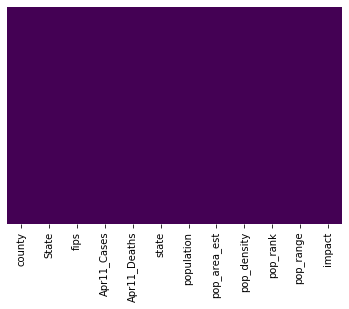

In [15]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [16]:
Highest_impact = df.groupby('impact').nunique()['county']

In [17]:
Highest_impact

impact
Critical    242
High        658
Low         447
Medium      591
Name: county, dtype: int64

In [41]:
counties = df.loc[df['impact'] =='Critical']

In [49]:
counties

,county,State,fips,Apr11_Cases,Apr11_Deaths,population,pop_area_est,pop_density,pop_rank,pop_range,impact
35,Jefferson,Alabama,1073,579,15,662401,2765.00,239.57,2900,10,Critical
43,Madison,Alabama,1089,186,3,359189,2200.36,163.24,2820,10,Critical
73,Maricopa,Arizona,4013,1891,47,4270185,18920.25,225.69,2890,10,Critical
135,Pulaski,Arkansas,5119,249,9,426392,1909.17,223.34,2889,10,Critical
151,Alameda,California,6001,827,21,1649339,2141.18,770.29,3042,10,Critical
...,...,...,...,...,...,...,...,...,...,...,...
2518,Kenosha,Wisconsin,55059,163,1,160633,529.01,303.65,2942,10,Critical
2527,Milwaukee,Wisconsin,55079,1653,85,954293,638.33,1494.98,3077,10,Critical
2537,Racine,Wisconsin,55101,105,3,206524,1178.48,175.25,2837,10,Critical
2550,Waukesha,Wisconsin,55133,201,6,403242,1592.28,253.25,2913,10,Critical


In [18]:
df.drop(columns = ['state'], inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2574
Data columns (total 11 columns):
county          2575 non-null object
State           2575 non-null object
fips            2575 non-null int64
Apr11_Cases     2575 non-null int64
Apr11_Deaths    2575 non-null int64
population      2575 non-null int64
pop_area_est    2575 non-null float64
pop_density     2575 non-null float64
pop_rank        2575 non-null int64
pop_range       2575 non-null int64
impact          2575 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 241.4+ KB


In [20]:
# sns.lmplot(x= 'population', y = 'cases', data = df_final)

In [21]:
# df = df.get_dummies['']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(['impact','county','State'],axis=1)
y = df['impact']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42, stratify = y)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
svc_model.score(X_train_scaled, y_train)
svc_model.score(X_test_scaled, y_test)

0.20827943078913325

In [29]:
print(f"Training Data Score: {svc_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svc_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.20754716981132076
Testing Data Score: 0.20827943078913325


In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,5,10], 'gamma':[0.0001,0.001,0.01]}
grid_svc = GridSearchCV(svc_model, param_grid, verbose = 3)

In [31]:
grid_svc.fit(X_train_scaled, y_train)

C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [32]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 1, 'gamma': 0.0001}
1.0


In [34]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
model_lr.score(X_train_scaled, y_train)
model_lr.score(X_test_scaled, y_test)

0.9702457956015524

In [36]:
print(f"Training Data Score: {model_lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_lr.score(X_test_scaled, y_test)}")

Training Data Score: 0.974472807991121
Testing Data Score: 0.9702457956015524


In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,5,10], 'penalty':['l2']}
grid_lr = GridSearchCV(model_lr, param_grid)

In [38]:
grid_lr.fit(X_train_scaled, y_train)

C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 10, 'penalty': 'l2'}
0.9905660377358491
